Notebook to save the tissue image into managable 2000x2000 chunks so that we can perform the bootstrapping

In [1]:
import numpy as np
import tissue
import cv2
import pickle
%load_ext autoreload
%autoreload 2

class empty: pass

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Declare if you want fresh data or if you want to run data based on a previous run

In [37]:
freshRun = False

if freshRun:
    randomizePopping = True
    orientImages = True
else:
    randomizePopping = False
    orientImages = False

### Load in previously preprocessed tissue image

In [22]:
#paramDict = tissue.SetupParams()
params = tissue.params
grayScaleTissue = tissue.Setup()
print "um per 2,000 pixels:", 2000 / params.px_per_um[0], 2000 / params.px_per_um[1]

rowExtent = np.shape(grayScaleTissue)[0]

um per 2,000 pixels: 351.786949297 351.779821244


In [23]:
distalExtent = rowExtent / 3
print "distal extent [px]:",distalExtent

medialExtent = rowExtent / 3 * 2
print "medial extent [px]:",medialExtent

proximalExtent = rowExtent
print "proximal extent [px]:",proximalExtent

distal extent [px]: 7422
medial extent [px]: 14844
proximal extent [px]: 22267


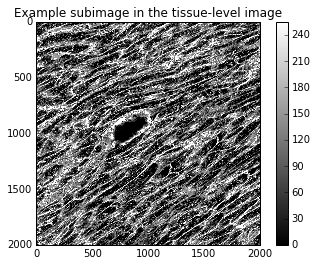

(22267, 23272)


In [24]:
plt.figure()
plt.imshow(grayScaleTissue[10000:12000,10000:12000],cmap='gray')
plt.colorbar()
plt.title("Example subimage in the tissue-level image")
plt.show()

imgDims = np.shape(grayScaleTissue)
print imgDims

### Chunk up image in 2000x2000 subimages

In [25]:
import preprocessing as pp
oldI = 0
oldJ = 0
i = 2000
j = 2000
distalNames = []
proximalNames = []

### for debug purposes
verbose = False

while i < imgDims[0]:
    while j < imgDims[1]:
        # determine if distal
        if i < distalExtent:
            fileName = 'infarctTissue_distal_row'+str(oldI)+'_col'+str(oldJ)+'.png'
            print "Processing and Writing:", fileName
            img = grayScaleTissue[oldI:i,oldJ:j].copy()
            
            cv2.imwrite(fileName,img)
            #print "Wrote:",fileName
            distalNames.append(fileName)
        elif i > medialExtent and i < proximalExtent:
            fileName = 'infarctTissue_proximal_row'+str(oldI)+'_col'+str(oldJ)+'.png'
            print "Processing and Writing:", fileName
            img = grayScaleTissue[oldI:i,oldJ:j].copy()
                        
            cv2.imwrite(fileName,img)
            #print "Wrote:",fileName
            proximalNames.append(fileName)
        if verbose and i == 2000:
            plt.figure()
            plt.imshow(img)
            plt.colorbar()
            plt.show()
        
        oldJ = j 
        j += 2000
    j = 2000
    oldJ = 0
    oldI = i
    i += 2000

Processing and Writing: infarctTissue_distal_row0_col0.png
Processing and Writing: infarctTissue_distal_row0_col2000.png
Processing and Writing: infarctTissue_distal_row0_col4000.png
Processing and Writing: infarctTissue_distal_row0_col6000.png
Processing and Writing: infarctTissue_distal_row0_col8000.png
Processing and Writing: infarctTissue_distal_row0_col10000.png
Processing and Writing: infarctTissue_distal_row0_col12000.png
Processing and Writing: infarctTissue_distal_row0_col14000.png
Processing and Writing: infarctTissue_distal_row0_col16000.png
Processing and Writing: infarctTissue_distal_row0_col18000.png
Processing and Writing: infarctTissue_distal_row0_col20000.png
Processing and Writing: infarctTissue_distal_row2000_col0.png
Processing and Writing: infarctTissue_distal_row2000_col2000.png
Processing and Writing: infarctTissue_distal_row2000_col4000.png
Processing and Writing: infarctTissue_distal_row2000_col6000.png
Processing and Writing: infarctTissue_distal_row2000_col80

### Went through and manually deleted incomplete subimages

In [26]:
files_to_delete = ["infarctTissue_distal_row0_col0.png",
                   "infarctTissue_distal_row0_col2000.png",
                   "infarctTissue_distal_row0_col4000.png",
                   "infarctTissue_distal_row0_col6000.png",
                   "infarctTissue_distal_row0_col8000.png",
                   #"infarctTissue_distal_row0_col10000.png", # suspect, may remove
                   "infarctTissue_distal_row2000_col0.png",
                   "infarctTissue_distal_row2000_col2000.png",
                   "infarctTissue_distal_row2000_col4000.png",
                   "infarctTissue_distal_row2000_col12000.png", # serious chunk of image is blood vessel
                   "infarctTissue_distal_row4000_col0.png",
                   #"infarctTissue_distal_row4000_col0.png", # ~1/4 is not tissue
                   "infarctTissue_distal_row4000_col16000.png", # large portion is blood vessel
                   "infarctTissue_proximal_row14000_col0.png",
                   "infarctTissue_proximal_row14000_col2000.png",
                   "infarctTissue_proximal_row14000_col4000.png",
                   "infarctTissue_proximal_row14000_col6000.png",
                   "infarctTissue_proximal_row14000_col8000.png", # MAY keep if we become desparate for proximal images
                   "infarctTissue_proximal_row16000_col0.png",
                   "infarctTissue_proximal_row16000_col2000.png",
                   "infarctTissue_proximal_row16000_col4000.png",
                   "infarctTissue_proximal_row16000_col6000.png",
                   #"infarctTissue_proximal_row16000_col8000.png", # will keep for now but this is suspect
                   "infarctTissue_proximal_row18000_col0.png",
                   "infarctTissue_proximal_row18000_col2000.png",
                   "infarctTissue_proximal_row18000_col4000.png",
                   "infarctTissue_proximal_row18000_col6000.png",
                   "infarctTissue_proximal_row18000_col18000.png",
                   "infarctTissue_proximal_row18000_col20000.png",
                   "infarctTissue_proximal_row20000_col0.png",
                   "infarctTissue_proximal_row20000_col2000.png",
                   "infarctTissue_proximal_row20000_col4000.png",
                   "infarctTissue_proximal_row20000_col6000.png",
                   "infarctTissue_proximal_row20000_col8000.png",
                   "infarctTissue_proximal_row20000_col10000.png",
                   "infarctTissue_proximal_row20000_col12000.png",
                   "infarctTissue_proximal_row20000_col14000.png",
                   "infarctTissue_proximal_row20000_col16000.png",
                   "infarctTissue_proximal_row20000_col18000.png",
                   "infarctTissue_proximal_row20000_col20000.png",
                   ]

In [27]:
import os 
for name in files_to_delete:
    print "Removing",name
    os.system("rm "+name)
    try:
        distalNames.remove(name)
    except:
        proximalNames.remove(name)

Removing infarctTissue_distal_row0_col0.png
Removing infarctTissue_distal_row0_col2000.png
Removing infarctTissue_distal_row0_col4000.png
Removing infarctTissue_distal_row0_col6000.png
Removing infarctTissue_distal_row0_col8000.png
Removing infarctTissue_distal_row2000_col0.png
Removing infarctTissue_distal_row2000_col2000.png
Removing infarctTissue_distal_row2000_col4000.png
Removing infarctTissue_distal_row2000_col12000.png
Removing infarctTissue_distal_row4000_col0.png
Removing infarctTissue_distal_row4000_col16000.png
Removing infarctTissue_proximal_row14000_col0.png
Removing infarctTissue_proximal_row14000_col2000.png
Removing infarctTissue_proximal_row14000_col4000.png
Removing infarctTissue_proximal_row14000_col6000.png
Removing infarctTissue_proximal_row14000_col8000.png
Removing infarctTissue_proximal_row16000_col0.png
Removing infarctTissue_proximal_row16000_col2000.png
Removing infarctTissue_proximal_row16000_col4000.png
Removing infarctTissue_proximal_row16000_col6000.png
R

In [28]:
print len(distalNames)
print len(proximalNames)

22
18


In [29]:
nDistal = 0
nProximal = 0
for name in os.listdir('./'):
    if 'infarctTissue_distal' in name:
        nDistal += 1
    elif 'infarctTissue_proximal' in name:
        nProximal += 1
print 'Distal N =',nDistal
print 'Proximal N =',nProximal

Distal N = 22
Proximal N = 18


### Pare down the group with the larger amount of subimages to match the number of subimages in the smaller region
Opting to do this in a random manner since this will cause the least amount of bias

In [30]:
Ncells = [nDistal,nProximal]
minN = np.min(Ncells)
argMinN = np.argmin(Ncells)

if randomizePopping:
    print "Randomizing the removal of myocytes"
    if argMinN == 0:
        diff = nProximal - minN
        while diff > 0:
            # generate random number in range of the number of cells
            index = np.random.randint(0,len(proximalNames)+1)
            print index
            proximalNames.pop(index)
            diff -= 1
    if argMinN == 1:
        diff = nDistal - minN
        while diff > 0:
            # generate random number in range of the number of cells
            index = np.random.randint(0,len(distalNames)+1)
            print index
            distalNames.pop(index)
            diff -= 1
    print "N Distal:",len(distalNames)
    print "N Proximal:",len(proximalNames)
    
else:
    ### we randomly did this earlier, so taking the integers from the random number generator so we can reproduce the exact same data
    ## popping the indexes in order
    distalNames.pop(17)
    distalNames.pop(10)
    distalNames.pop(2)
    distalNames.pop(15)
    
    print "N Distal:",len(distalNames)
    print "N Proximal:",len(proximalNames)

Randomizing the removal of myocytes
17
10
2
15
N Distal: 18
N Proximal: 18


### Save Distal and Proximal Names

In [36]:
with open('./infarctedTissue_distalNames.pkl','w') as f:
    pickle.dump(distalNames,f)
with open('./infarctedTissue_proximalNames.pkl','w') as f:
    pickle.dump(proximalNames,f)

### Now we orient the images

In [31]:
if orientImages:
    import os 
    import util
    import preprocessing as pp
    orientationDict = {}
    for name in os.listdir('./'):
        if "infarctTissue" in name:
            img = util.ReadImg(name)#.astype(np.float32)
            #img /= tissueMax
            print name
            _, dOffCenter = pp.reorient(img)
            orientationDict[name] = dOffCenter
            print ""
    with open('./infarctedTissue_OrientationDictionary.pkl','w') as f:
        pickle.dump(orientationDict,f)
    print "Preprocessed all images"
else:
    with open('./infarctedTissue_OrientationDictionary.pkl','r') as blah:
        orientationDict = pickle.load(blah)
    print "Loaded orientation dictionary from repo"

infarctTissue_proximal_row16000_col14000.png
Reorienting Myocyte
Image is 44.3806102968 degrees off center

infarctTissue_proximal_row16000_col20000.png
Reorienting Myocyte
Image is 63.4976013726 degrees off center

infarctTissue_proximal_row14000_col12000.png
Reorienting Myocyte
Image is 43.8120089474 degrees off center

infarctTissue_distal_row4000_col18000.png
Reorienting Myocyte
Image is 28.4307573116 degrees off center

infarctTissue_distal_row2000_col10000.png
Reorienting Myocyte
Image is 30.3133120501 degrees off center

infarctTissue_distal_row2000_col8000.png
Reorienting Myocyte
Image is 24.7496020015 degrees off center

infarctTissue_proximal_row14000_col10000.png
Reorienting Myocyte
Image is 38.5322677745 degrees off center

infarctTissue_distal_row4000_col12000.png
Reorienting Myocyte
Image is 21.8078573571 degrees off center

infarctTissue_distal_row0_col12000.png
Reorienting Myocyte
Image is 16.8650941553 degrees off center

infarctTissue_distal_row4000_col4000.png
Reorie

### Now remove the dictionary entries for the files that we've excluded

In [32]:
finalOrientationDict = {}

cellNames = distalNames + proximalNames
for name,value in orientationDict.iteritems():
    if name in cellNames:
        finalOrientationDict[name] = value

filter y,x: 10 19
infarctTissue_proximal_row18000_col16000.png
WT Filtering
0.61382


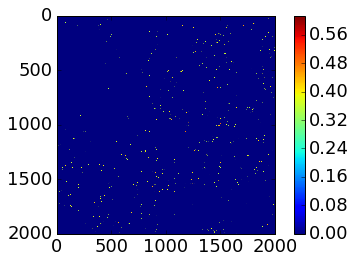

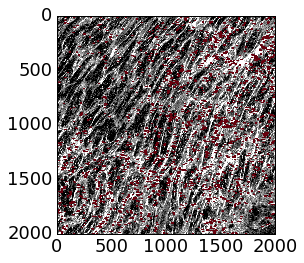

infarctTissue_distal_row4000_col18000.png
WT Filtering
0.690997


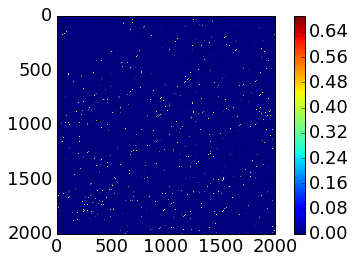

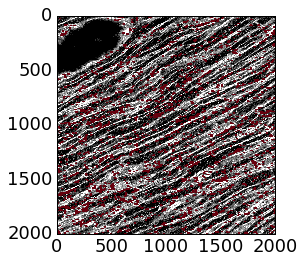

infarctTissue_proximal_row14000_col16000.png
WT Filtering
0.662116


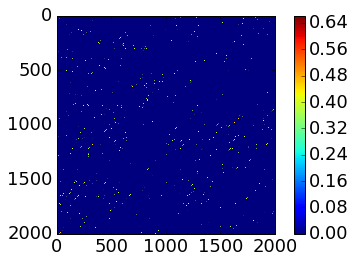

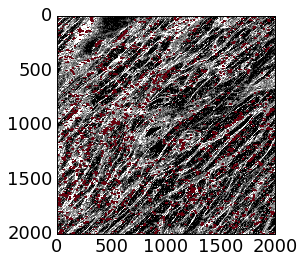

infarctTissue_distal_row0_col12000.png
WT Filtering


KeyboardInterrupt: 

In [34]:
inputs = empty()
inputs.useGPU = False
ttFilterName = "./myoimages/newSimpleWTFilter.png"
ttPunishmentName = "./myoimages/newSimpleWTPunishmentFilter.png"
ltFilterName = "./myoimages/LongitudinalFilter.png"
lossFilterName = "./myoimages/LossFilter.png"
returnAngles = True

### scalar for scaling the intensity. This is just using the clip limit that we imposed earlier
tissueMax = float(ceilingValue)

import painter
import display_util as du
import myocyteFigs as mF
import util

ttFilter = util.LoadFilter(ttFilterName)
ttY,ttX = util.measureFilterDimensions(ttFilter)

proximalMeans = []
distalMeans = []
for name,degreesOffCenter in finalOrientationDict.iteritems():
    if 'infarctTissue' in name:
        print name
        img = util.ReadImg(name).astype(np.float32)
        #print np.max(img)
        img /= 255.
        inputs.imgOrig = img
        
        # to account for rotations
        degreesOffCenter = orientationDict[name]
        iters = [-25,-20,-15,-10,-5,0,5,10,15,20,25] - degreesOffCenter 
        #print iters
        
        ### do filtering for content
        WTresults = mF.WT_Filtering(inputs,iters,ttFilterName,ttPunishmentName,None,None,returnAngles)
        print np.max(WTresults.stackedHits)
        
        plt.figure()
        plt.imshow(WTresults.stackedHits)
        plt.colorbar()
        plt.show()
        
        WT_hits = painter.doLabel(WTresults,dx=ttX,dy=ttY,thresh=0)
        
        du.StackGrayRedAlpha(img,WT_hits)
        plt.show()
        
        WT_hits[WT_hits != 0] = 1
        if 'proximal' in name:
            proximalMeans.append(np.mean(WT_hits))
        else:
            distalMeans.append(np.mean(WT_hits))
print "Proximal Means", proximalMeans
print "Distal Means",distalMeans

print "Proximal Average Mean",np.mean(proximalMeans)
print "Proximal Std Dev",np.std(proximalMeans)
print "Distal Average Mean",np.mean(distalMeans)
print "Distal Std Dev",np.std(distalMeans)

        
        